In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bionetgen
#import roadrunner

# Load model from BNGL
model_name='mm'
model = bionetgen.bngmodel(model_name + '.bngl') 
sim = model.setup_simulator() # sim is a libroadrunner simulator object

## Generate synthetic data by running model with default parameter values

Written to file mm.csv


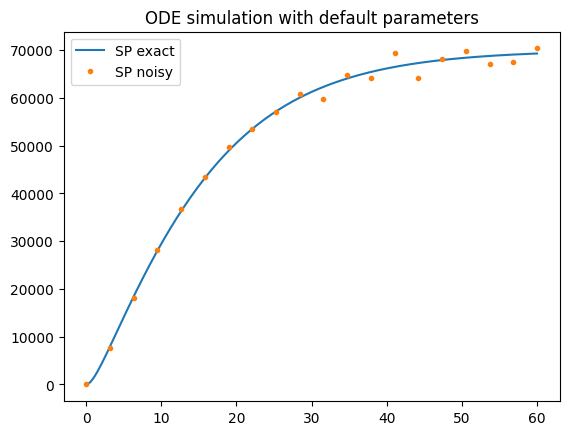

In [5]:
# Simulate using RoadRunner defaults (ODEs)
onames= [ o for o in model.observables]
pnames= [p for p in model.parameters]
fnames= [f for f in model.functions]
obs= [onames[-1]] # Fit values of last observable
sel = ['Time'] + obs 
times= np.array([0.,5.,10.,20.,30.,45.,60.])
times= np.linspace(0,60,20)
sim.reset()
res= sim.simulate(times=times, selections=sel)
mod_df= pd.DataFrame(data=res[:,:],columns=sel)
# Add noise to observables
for o in obs:
    ovals= mod_df[o]
    # Don't add noise to the first (t=0) time point
    mod_df[o][1:]+=  np.random.normal(loc=0,scale=0.02*ovals[1:],size=len(ovals)-1)
mod_df.to_csv(model_name+'.csv', index=False)
print(f"Written to file {model_name+'.csv'}")

# Run model on finer timescale
sim.reset()
res= sim.simulate(times[0],times[-1],200, selections=sel)

# Plot observables
for o in obs:
    plt.plot(res['time'],res[o],label=o + ' exact')
    plt.plot(mod_df['Time'], mod_df[o],'.',label=o + ' noisy')
plt.title("ODE simulation with default parameters")
_= plt.legend()